In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print(pd.__version__)

2.2.1


In [44]:
# loading emg data & time marker from test-1 folder
emg_data_path = 'test-new/0-New_Task-recording-0.csv'
time_marker_path = 'test-new/time_marker.csv'

emg_data = pd.read_csv(emg_data_path, skiprows=[0,1,3,4])
time_marker = pd.read_csv(time_marker_path)

### EMG data Processing

In [45]:
# Reset emg data index with Channels
emg_data = emg_data.set_index('Channels')
emg_data

17    18    19    20    21    22    23    24
Channels                                                
0         2508  1311  2601  1099  1212  1028 -1143 -1249
1600      1865  1182   754    94    68    11 -1138 -1130
3200       382   961  -327   240  -462   -75  -445   -66
4800      -493   -87 -1505  -375  -872  -558  -722  -211
6400     -1565  -666 -2092  -724 -1142  -809  -769   255
...        ...   ...   ...   ...   ...   ...   ...   ...
95198400 -2717 -2701 -2697 -2706 -2692 -2691 -2680 -2703
95194910     0     0     0     0     0     0     0     0
95196510     0     0     0     0     0     0     0     0
95198110     0     0     0     0     0     0     0     0
95199710     0     0     0     0     0     0     0     0

[59504 rows x 8 columns]

In [5]:
emg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59504 entries, 0 to 95199710
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   17      59504 non-null  int64
 1   18      59504 non-null  int64
 2   19      59504 non-null  int64
 3   20      59504 non-null  int64
 4   21      59504 non-null  int64
 5   22      59504 non-null  int64
 6   23      59504 non-null  int64
 7   24      59504 non-null  int64
dtypes: int64(8)
memory usage: 4.1 MB


In [30]:
# Get signal data from difference of emg_data
signal_left_lateral = emg_data['21'] - emg_data['3']
signal_left_medial = emg_data['22'] - emg_data['2']

signal_right_lateral = emg_data['16'] - emg_data['6']
signal_right_medial = emg_data['17'] - emg_data['5']

In [46]:
# Get signal data from difference of emg_data
signal_left_lateral = emg_data['17'] - emg_data['18']
signal_left_medial = emg_data['19'] - emg_data['20']

signal_right_lateral = emg_data['23'] - emg_data['24']
signal_right_medial = emg_data['21'] - emg_data['22']

In [47]:
# RMS caculation

# Define the moving average window size
N = 25

# Function to calculate moving RMS
def moving_rms(signal, window_size):
    rms = np.sqrt(pd.Series(signal).rolling(window=window_size).mean()**2)
    rms.index = signal.index  # Ensure the index matches the original signal
    return rms

# Calculate moving RMS for each channel
signal_left_lateral_RMS = moving_rms(signal_left_lateral, N)
signal_left_medial_RMS = moving_rms(signal_left_medial, N)
signal_right_lateral_RMS = moving_rms(signal_right_lateral, N)
signal_right_medial_RMS = moving_rms(signal_right_medial, N)

# Calculate mean and standard deviation of the RMS signals
mean_ch1_rms = np.mean(signal_left_lateral_RMS)
std_ch1_rms = np.std(signal_left_lateral_RMS)

mean_ch2_rms = np.mean(signal_left_medial_RMS)
std_ch2_rms = np.std(signal_left_medial_RMS)

mean_ch3_rms = np.mean(signal_right_lateral_RMS)
std_ch3_rms = np.std(signal_right_lateral_RMS)

mean_ch4_rms = np.mean(signal_right_medial_RMS)
std_ch4_rms = np.std(signal_right_medial_RMS)

# Print mean and standard deviation values
print(f'Mean of RMS Signal 1: {mean_ch1_rms: .3f}, Std Dev of RMS Signal 1: {std_ch1_rms: .3f}')
print(f'Mean of RMS Signal 2: {mean_ch2_rms: .3f}, Std Dev of RMS Signal 2: {std_ch2_rms: .3f}')
print(f'Mean of RMS Signal 3: {mean_ch3_rms: .3f}, Std Dev of RMS Signal 3: {std_ch3_rms: .3f}')
print(f'Mean of RMS Signal 4: {mean_ch4_rms: .3f}, Std Dev of RMS Signal 4: {std_ch4_rms: .3f}')

Mean of RMS Signal 1:  414.735, Std Dev of RMS Signal 1:  702.679
Mean of RMS Signal 2:  443.660, Std Dev of RMS Signal 2:  578.622
Mean of RMS Signal 3:  440.785, Std Dev of RMS Signal 3:  622.244
Mean of RMS Signal 4:  483.905, Std Dev of RMS Signal 4:  758.514


In [48]:
signal_left_lateral_RMS.head(30)

Channels
0           NaN
1600        NaN
3200        NaN
4800        NaN
6400        NaN
8000        NaN
9600        NaN
11200       NaN
12800       NaN
14400       NaN
16000       NaN
17600       NaN
19200       NaN
20800       NaN
22400       NaN
24000       NaN
25600       NaN
27200       NaN
28800       NaN
30400       NaN
32000       NaN
33600       NaN
35200       NaN
36800       NaN
38400    101.80
40000    187.36
41600    257.64
43200    258.04
44800    249.12
46400    213.04
dtype: float64

In [33]:
np.mean(signal_left_lateral_RMS.loc[:10000000])

131.65497112394493

In [34]:
np.std(signal_left_lateral_RMS.loc[:10000000])

101.73584628144596

In [49]:
signal_left_lateral_RMS.loc[:10000000].std()

90.46881927178374

### Time Marker Processing

In [50]:
time_marker = pd.read_csv(time_marker_path)
time_marker = time_marker[['0-New_Task-recording_time(us)', 'description', 'tag']]
time_marker = time_marker.rename(columns={'0-New_Task-recording_time(us)': 'event_time'})
time_marker

event_time description    tag
0   78357902.0       Cough  start
1   79670999.0       Cough    end
2   81227489.0        Bite  start
3   82465323.0        Bite    end
4   84239727.0     Swallow  start
5   85434346.0     Swallow    end
6   86628547.0     Swallow  start
7   87951834.0     Swallow    end
8   89673825.0     Swallow  start
9   91158663.0     Swallow    end
10  92257779.0       Cough  start
11  93714668.0       Cough    end

In [35]:
time_marker = pd.read_csv(time_marker_path)
time_marker = time_marker[['0-New_Task-recording_time(us)', 'name', 'tag']]
time_marker = time_marker.rename(columns={'0-New_Task-recording_time(us)': 'event_time'})
time_marker

event_time     name    tag
0   32030195.0     bite  start
1   56294235.0     bite    end
2   60284534.0  swallow  start
3   62478843.0  swallow    end
4   67892676.0  swallow  start
5   69216432.0  swallow    end
6   71896644.0  swallow  start
7   73034917.0  swallow    end
8   77098837.0    cough  start
9   79341557.0    cough    end
10  82717865.0    cough  start
11  83992269.0    cough    end
12  86344529.0    cough  start
13  88152623.0    cough    end

In [51]:
# Select column value with odd/even index
event_start_times = time_marker.loc[0::2]['event_time'].values.astype(int)
event_end_times = time_marker.loc[1::2]['event_time'].values.astype(int)
event_names = time_marker.loc[0::2]['description'].values

In [36]:
# Select column value with odd/even index
event_start_times = time_marker.loc[0::2]['event_time'].values.astype(int)
event_end_times = time_marker.loc[1::2]['event_time'].values.astype(int)
event_names = time_marker.loc[0::2]['name'].values

In [52]:
# Get signal basic 10s std
signal_left_lateral_basics_10s_std = signal_left_lateral_RMS.loc[: 10000000].std()
print(f"signal LL basic 10s std : {signal_left_lateral_basics_10s_std: .3f}")

signal_right_lateral_basics_10s_std = signal_right_lateral_RMS.loc[: 10000000].std()
print(f"signal RL basic 10s std : {signal_right_lateral_basics_10s_std: .3f}")

signal LL basic 10s std :  90.469
signal RL basic 10s std :  64.398


In [18]:
import matplotlib.pyplot as plt

def emg_plot(event_index, event_plot_name, left_std_ratio, left_delta_t, right_std_ratio, right_delta_t):
    """
    Plots a 2D quadrant chart for EMG signal analysis with colored squares indicating the quadrant.

    Parameters:
    std (float): Standard deviation value of the EMG signal.
    delta_t (float): Delta T value of the EMG signal.
    """
    # Create a new figure
    fig, ax = plt.subplots(figsize=(8, 8))

    # Determine the quadrant and plot the colored square
    if left_std_ratio > 3 and left_delta_t > 0:
        # First quadrant
        ax.add_patch(plt.Rectangle((2, 2), 6, 6, color='blue', alpha=0.5))
    elif left_std_ratio <= 3 and left_delta_t > 0:
        # Second quadrant
        ax.add_patch(plt.Rectangle((-8, 2), 6, 6, color='blue', alpha=0.5))
    elif left_std_ratio <= 3 and left_delta_t <= 0:
        # Third quadrant
        ax.add_patch(plt.Rectangle((-8, -8), 6, 6, color='blue', alpha=0.5))
    elif left_std_ratio > 3 and left_delta_t <= 0:
        # Fourth quadrant
        ax.add_patch(plt.Rectangle((2, -8), 6, 6, color='blue', alpha=0.5))
        
    # Determine the quadrant and plot the colored square
    if right_std_ratio > 3 and right_delta_t > 0:
        # First quadrant
        ax.add_patch(plt.Rectangle((1.5, 1.5), 6, 6, color='green', alpha=0.5))
    elif right_std_ratio <= 3 and right_delta_t > 0:
        # Second quadrant
        ax.add_patch(plt.Rectangle((-8.5, 1.5), 6, 6, color='green', alpha=0.5))
    elif right_std_ratio <= 3 and right_delta_t <= 0:
        # Third quadrant
        ax.add_patch(plt.Rectangle((-8.5, -8.5), 6, 6, color='green', alpha=0.5))
    elif right_std_ratio > 3 and right_delta_t <= 0:
        # Fourth quadrant
        ax.add_patch(plt.Rectangle((1.5, -8.5), 6, 6, color='green', alpha=0.5))

    # Add horizontal and vertical lines to create quadrants
    plt.axhline(y=0, color='black', linestyle='--')
    plt.axvline(x=0, color='black', linestyle='--')

    # Add title and axis labels
    plt.title(f'Muscle Coordination Analysis - {event_index}:{event_plot_name}', fontsize=14)
    plt.xlabel('Std Ratio > 3', fontsize=12)
    plt.ylabel('Delta T > 0', fontsize=12)

    # Remove axis numbers and labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    # Set plot legend with color
    plt.legend(['Left', 'Right'], loc='upper left', fontsize=10)

    # Set the limits of the plot
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)

    # Display the plot
    plt.show()


In [68]:
event_start_times[0]

78357902

In [67]:
event_end_times[0]

79670999

In [54]:
type(event_start_times[0])

numpy.int32

In [55]:
type(signal_left_lateral_RMS)

pandas.core.series.Series

In [78]:
mask = (signal_left_lateral_RMS.index >= event_start_times[0]) & (signal_left_lateral_RMS.index <= event_end_times[0])
signal_left_lateral_RMS.iloc[mask]

Channels
78358400    369.00
78360000    380.12
78361600    285.88
78363200    238.68
78364800    215.96
             ...  
79664000     36.44
79665600     34.52
79667200     32.32
79668800     29.92
79670400     14.52
Length: 821, dtype: float64

In [76]:
# Convert microsecond timestamps to array indices
def get_nearest_index(series, timestamp):
    return series.index[series.index.get_loc(timestamp)]

# Then use:
start_idx = get_nearest_index(signal_left_lateral_RMS, event_start_times[0])  
end_idx = get_nearest_index(signal_left_lateral_RMS, event_end_times[0])
event_data = signal_left_lateral_RMS.loc[start_idx:end_idx]

KeyError: 78357902

In [70]:
start_time = signal_left_lateral_RMS.index.get_loc(int(event_start_times[0]))
start_time

KeyError: 78357902

In [72]:
# Use nearest method to find the closest index values
# start_time = signal_left_lateral_RMS.index.get_loc(event_start_times[0], method='nearest')
# end_time = signal_left_lateral_RMS.index.get_loc(event_end_times[0], method='nearest')

signal_left_lateral_RMS.loc[event_start_times[0] : event_end_times[0]]

KeyError: 78357902

Event 1: Cough
Start time:  78.358 sec, End time:  79.671 sec
left std ratio:  1.008, right std ratio:  2.445
LM_max_index:  79.310, LL_max_index:  78.360, left delta t:  0.950
RM_max_index:  78.814, RL_max_index:  79.126, right delta t: -0.312


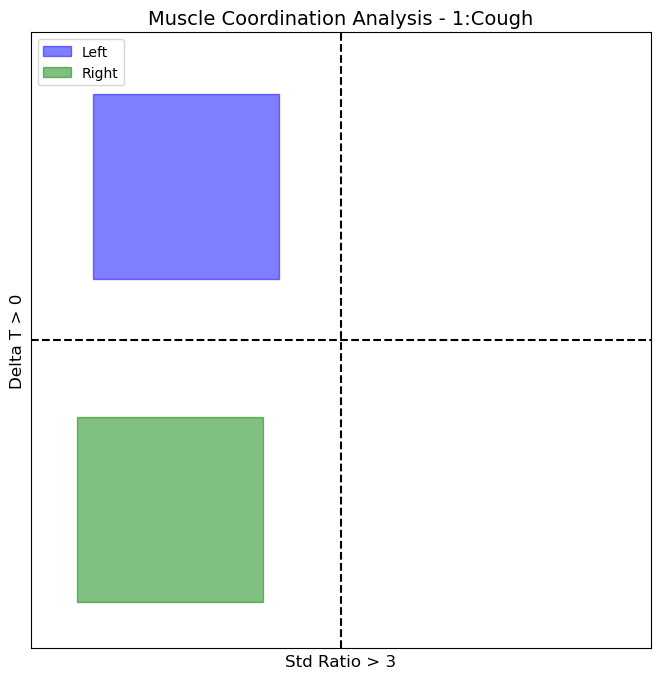

Event 2: Bite
Start time:  81.227 sec, End time:  82.465 sec
left std ratio:  1.518, right std ratio:  6.700
LM_max_index:  81.672, LL_max_index:  81.954, left delta t: -0.282
RM_max_index:  81.611, RL_max_index:  81.656, right delta t: -0.045


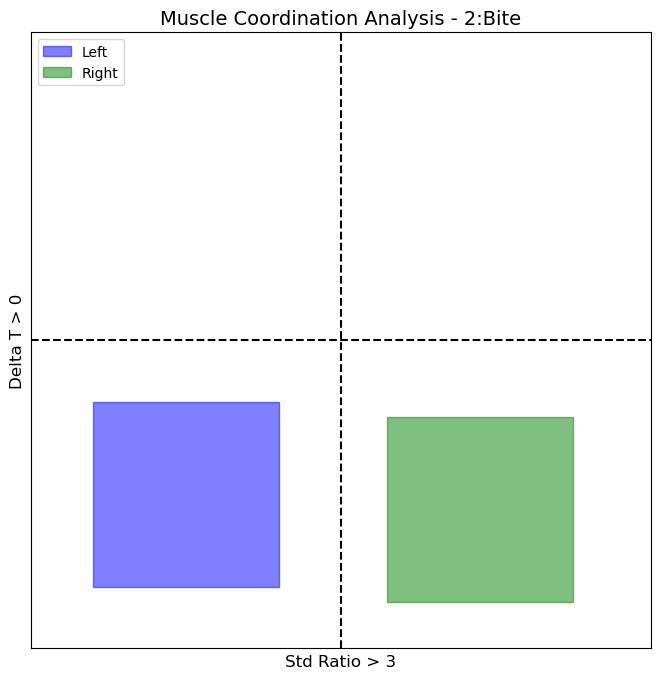

Event 3: Swallow
Start time:  84.240 sec, End time:  85.434 sec
left std ratio:  1.512, right std ratio:  5.680
LM_max_index:  84.914, LL_max_index:  85.347, left delta t: -0.434
RM_max_index:  85.064, RL_max_index:  85.357, right delta t: -0.293


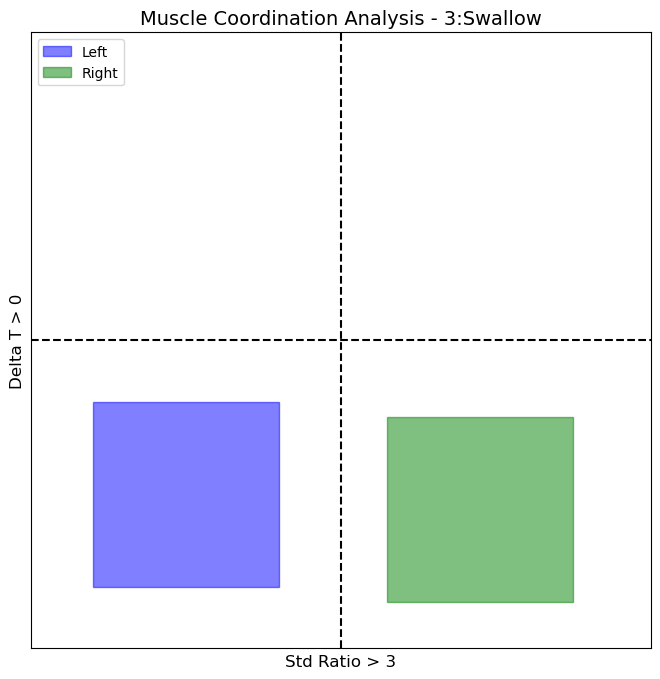

Event 4: Swallow
Start time:  86.629 sec, End time:  87.952 sec
left std ratio:  1.689, right std ratio:  4.807
LM_max_index:  87.749, LL_max_index:  87.533, left delta t:  0.216
RM_max_index:  87.331, RL_max_index:  87.098, right delta t:  0.234


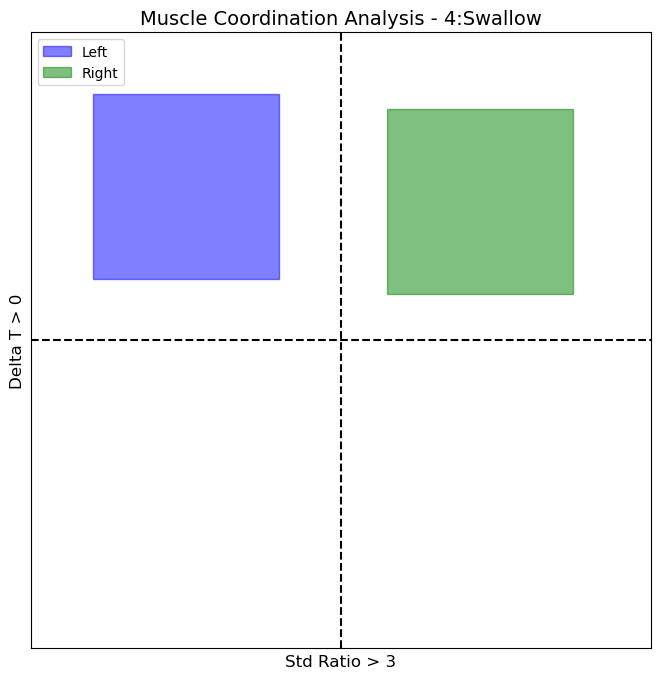

Event 5: Swallow
Start time:  89.674 sec, End time:  91.159 sec
left std ratio:  1.318, right std ratio:  4.252
LM_max_index:  90.611, LL_max_index:  90.832, left delta t: -0.221
RM_max_index:  90.851, RL_max_index:  90.176, right delta t:  0.675


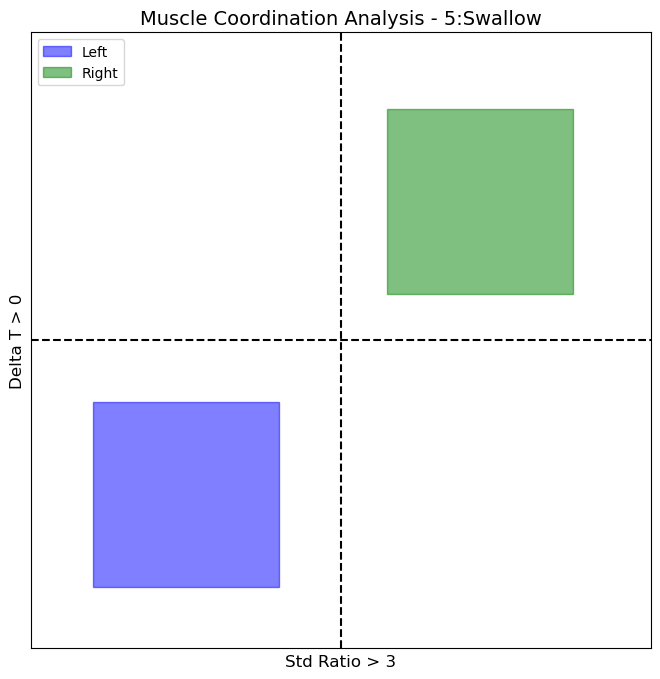

Event 6: Cough
Start time:  92.258 sec, End time:  93.715 sec
left std ratio:  1.773, right std ratio:  4.874
LM_max_index:  93.262, LL_max_index:  93.605, left delta t: -0.342
RM_max_index:  93.386, RL_max_index:  92.814, right delta t:  0.571


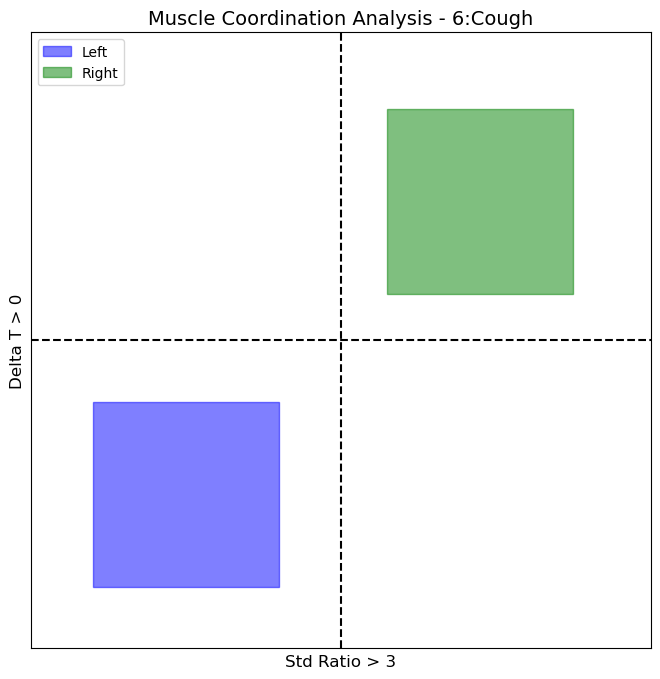

In [79]:
# Analyze event data 
event_number = len(event_names)

for i in range(1, 2*event_number, 2):
    event_name = event_names[i//2]
    event_start_time = event_start_times[i//2]
    event_end_time = event_end_times[i//2]
    
    print(f"Event {i//2+1}: {event_name}")
    print(f"Start time: {float(event_start_time)/1000000: .3f} sec, End time: {float(event_end_time)/1000000: .3f} sec")
    
    # Get event signal data with event time duration
    mask_LL = (signal_left_lateral_RMS.index >= event_start_time) & (signal_left_lateral_RMS.index <= event_end_time)
    event_signal_LL = signal_left_lateral_RMS.iloc[mask_LL]
    
    mask_LM = (signal_left_medial_RMS.index >= event_start_time) & (signal_left_medial_RMS.index <= event_end_time)
    event_signal_LM = signal_left_medial_RMS.iloc[mask_LM]
    
    mask_RL = (signal_right_lateral_RMS.index >= event_start_time) & (signal_right_lateral_RMS.index <= event_end_time)
    event_signal_RL = signal_right_lateral_RMS.iloc[mask_RL]
    
    mask_RM = (signal_right_medial_RMS.index >= event_start_time) & (signal_right_medial_RMS.index <= event_end_time)
    event_signal_RM = signal_right_medial_RMS.iloc[mask_RM]
    
    # Calculate std ratio 
    left_event_std = event_signal_LL.std()
    left_std_ratio = left_event_std / signal_left_lateral_basics_10s_std
    
    right_event_std = event_signal_RL.std()
    right_std_ratio = right_event_std / signal_right_lateral_basics_10s_std
    
    print(f"left std ratio: {left_std_ratio: .3f}, right std ratio: {right_std_ratio: .3f}")
    
    # Get signal max value index
    LL_max_index = event_signal_LL.idxmax()
    LM_max_index = event_signal_LM.idxmax()
    left_delta_t = LM_max_index - LL_max_index
    print(f"LM_max_index: {float(LM_max_index)/1000000: .3f}, LL_max_index: {float(LL_max_index)/1000000: .3f}, left delta t: {float(left_delta_t)/1000000: .3f}")
    
    RL_max_index = event_signal_RL.idxmax()
    RM_max_index = event_signal_RM.idxmax()
    right_delta_t = RM_max_index - RL_max_index
    print(f"RM_max_index: {float(RM_max_index)/1000000: .3f}, RL_max_index: {float(RL_max_index)/1000000: .3f}, right delta t: {float(right_delta_t)/1000000: .3f}")
    
    # Plot with each event data
    emg_plot(i//2+1, event_name, left_std_ratio, left_delta_t, right_std_ratio, right_delta_t)